In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install mplsoccer
!pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.8 MB/s eta 0:00:00


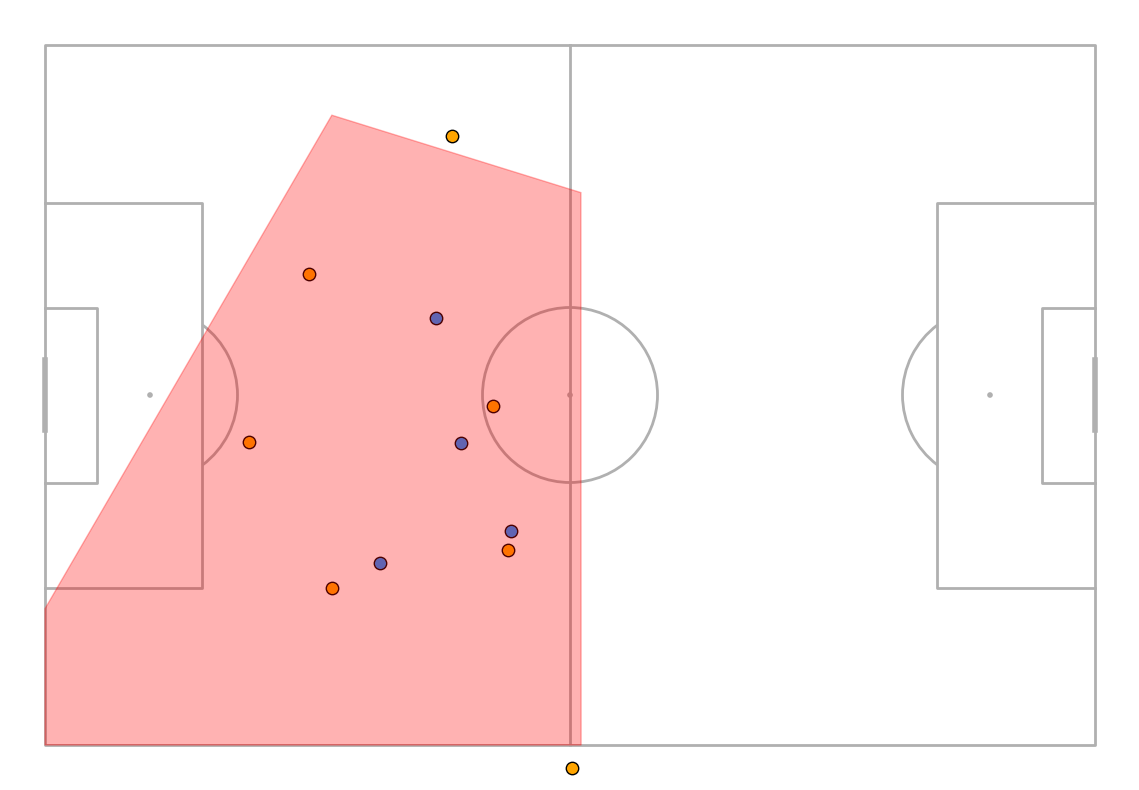

In [ ]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen
import numpy as np

## load in Statsbomb360 data remotely
parser = Sbopen()
frames, visible = parser.frame(3895052)

## get plotting data
frame_idx = 50
frame_id = visible.iloc[50].id

visible_area = np.array(visible.iloc[frame_idx].visible_area).reshape(-1, 2)
player_position_data = frames[frames.id == frame_id]

teammate_locs = player_position_data[player_position_data.teammate]
opponent_locs = player_position_data[~player_position_data.teammate]

## set up pitch
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12,8))

p.scatter(teammate_locs.x, teammate_locs.y, c='orange', s=80, ec='k', ax=ax)
p.scatter(opponent_locs.x, opponent_locs.y, c='dodgerblue', s=80, ec='k', ax=ax)
p.polygon([visible_area], color=(1, 0, 0, 0.3), ax=ax)

plt.show() ##to see the plot. You don't need this if you're using a jupyter notebook